In [1]:
# Import libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import Perceptron
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer 

In [2]:
# Load dataset
df = pd.read_csv('Indicadores_municipales_sabana_DA.csv', index_col=0, encoding='latin-1')
df

,nom_ent,mun,clave_mun,nom_mun,pobtot_ajustada,pobreza,pobreza_e,pobreza_m,vul_car,vul_ing,...,pobreza_alim_10,pobreza_cap_90,pobreza_cap_00,pobreza_cap_10,pobreza_patrim_90,pobreza_patrim_00,pobreza_patrim_10,gini_90,gini_00,gini_10
ent,,,,,,,,,,,,,,,,,,,,,
1,Aguascalientes,1,1001,Aguascalientes,794304,30.531104,2.264478,28.266627,27.983320,8.419106,...,11.805700,20.4,12.7,18.474600,43.4,33.7,41.900398,0.473,0.425,0.422628
1,Aguascalientes,2,1002,Asientos,48592,67.111172,8.040704,59.070468,22.439389,5.557604,...,21.993299,39.9,29.0,30.980801,64.2,48.9,59.175800,0.379,0.533,0.343879
1,Aguascalientes,3,1003,Calvillo,53104,61.360527,7.241238,54.119289,29.428583,2.921336,...,19.266800,39.5,33.1,28.259199,63.9,57.9,56.504902,0.414,0.465,0.386781
1,Aguascalientes,4,1004,Cosío,14101,52.800458,4.769001,48.031458,27.128568,7.709276,...,14.303200,35.2,21.0,22.386101,59.7,40.1,51.164501,0.392,0.541,0.344984
1,Aguascalientes,5,1005,Jesús María,101379,45.338512,6.084037,39.254475,26.262912,8.279864,...,15.085100,36.6,22.6,22.139999,60.6,42.2,45.703899,0.391,0.469,0.458083
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32,Zacatecas,54,32054,Villa Hidalgo,21016,74.848837,12.301183,62.547654,19.229856,3.177689,...,30.055300,51.8,54.8,41.368999,73.5,70.9,70.859596,0.403,0.589,0.342037
32,Zacatecas,55,32055,Villanueva,27385,65.450191,10.203506,55.246687,23.623556,5.007426,...,13.138800,34.2,25.9,20.563601,57.8,44.1,46.659199,0.422,0.463,0.362527
32,Zacatecas,56,32056,Zacatecas,117528,29.541959,3.535624,26.006335,16.644262,8.828019,...,7.164800,15.7,20.7,12.115300,36.6,41.8,32.302700,0.528,0.498,0.436339


In [3]:
# Create a LabelEncoder object for 'ent_name'
label_encoder_ent = LabelEncoder()

# Adjust and transform the 'ent_name' column into a numerical value
df['Estado'] = label_encoder_ent.fit_transform(df['nom_ent']) + 1

# Create a LabelEncoder object for 'mun_name'
label_encoder_mun = LabelEncoder()

# Adjust and transform the 'mun_name' column into a numerical value
df['Municipio'] = label_encoder_mun.fit_transform(df['nom_mun']) + 1

In [4]:
df

,nom_ent,mun,clave_mun,nom_mun,pobtot_ajustada,pobreza,pobreza_e,pobreza_m,vul_car,vul_ing,...,pobreza_cap_00,pobreza_cap_10,pobreza_patrim_90,pobreza_patrim_00,pobreza_patrim_10,gini_90,gini_00,gini_10,Estado,Municipio
ent,,,,,,,,,,,,,,,,,,,,,
1,Aguascalientes,1,1001,Aguascalientes,794304,30.531104,2.264478,28.266627,27.983320,8.419106,...,12.7,18.474600,43.4,33.7,41.900398,0.473,0.425,0.422628,1,36
1,Aguascalientes,2,1002,Asientos,48592,67.111172,8.040704,59.070468,22.439389,5.557604,...,29.0,30.980801,64.2,48.9,59.175800,0.379,0.533,0.343879,1,125
1,Aguascalientes,3,1003,Calvillo,53104,61.360527,7.241238,54.119289,29.428583,2.921336,...,33.1,28.259199,63.9,57.9,56.504902,0.414,0.465,0.386781,1,236
1,Aguascalientes,4,1004,Cosío,14101,52.800458,4.769001,48.031458,27.128568,7.709276,...,21.0,22.386101,59.7,40.1,51.164501,0.392,0.541,0.344984,1,431
1,Aguascalientes,5,1005,Jesús María,101379,45.338512,6.084037,39.254475,26.262912,8.279864,...,22.6,22.139999,60.6,42.2,45.703899,0.391,0.469,0.458083,1,756
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32,Zacatecas,54,32054,Villa Hidalgo,21016,74.848837,12.301183,62.547654,19.229856,3.177689,...,54.8,41.368999,73.5,70.9,70.859596,0.403,0.589,0.342037,32,2186
32,Zacatecas,55,32055,Villanueva,27385,65.450191,10.203506,55.246687,23.623556,5.007426,...,25.9,20.563601,57.8,44.1,46.659199,0.422,0.463,0.362527,32,2215
32,Zacatecas,56,32056,Zacatecas,117528,29.541959,3.535624,26.006335,16.644262,8.828019,...,20.7,12.115300,36.6,41.8,32.302700,0.528,0.498,0.436339,32,2267


In [5]:
# Remove columns
df = df.drop(['nom_ent', 'nom_mun', 'gdo_rezsoc00', 'gdo_rezsoc05', 'gdo_rezsoc10'], axis=1)
dataset = df.copy()

In [6]:
dataset

,mun,clave_mun,pobtot_ajustada,pobreza,pobreza_e,pobreza_m,vul_car,vul_ing,npnv,ic_rezedu,...,pobreza_cap_00,pobreza_cap_10,pobreza_patrim_90,pobreza_patrim_00,pobreza_patrim_10,gini_90,gini_00,gini_10,Estado,Municipio
ent,,,,,,,,,,,,,,,,,,,,,
1,1,1001,794304,30.531104,2.264478,28.266627,27.983320,8.419106,33.066469,14.970553,...,12.7,18.474600,43.4,33.7,41.900398,0.473,0.425,0.422628,1,36
1,2,1002,48592,67.111172,8.040704,59.070468,22.439389,5.557604,4.891835,21.222712,...,29.0,30.980801,64.2,48.9,59.175800,0.379,0.533,0.343879,1,125
1,3,1003,53104,61.360527,7.241238,54.119289,29.428583,2.921336,6.289554,27.361207,...,33.1,28.259199,63.9,57.9,56.504902,0.414,0.465,0.386781,1,236
1,4,1004,14101,52.800458,4.769001,48.031458,27.128568,7.709276,12.361698,20.889023,...,21.0,22.386101,59.7,40.1,51.164501,0.392,0.541,0.344984,1,431
1,5,1005,101379,45.338512,6.084037,39.254475,26.262912,8.279864,20.118712,20.578144,...,22.6,22.139999,60.6,42.2,45.703899,0.391,0.469,0.458083,1,756
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32,54,32054,21016,74.848837,12.301183,62.547654,19.229856,3.177689,2.743618,27.350040,...,54.8,41.368999,73.5,70.9,70.859596,0.403,0.589,0.342037,32,2186
32,55,32055,27385,65.450191,10.203506,55.246687,23.623556,5.007426,5.918827,29.914879,...,25.9,20.563601,57.8,44.1,46.659199,0.422,0.463,0.362527,32,2215
32,56,32056,117528,29.541959,3.535624,26.006335,16.644262,8.828019,44.985759,11.936088,...,20.7,12.115300,36.6,41.8,32.302700,0.528,0.498,0.436339,32,2267


In [7]:
# Fill empty spaces

imputer = SimpleImputer(strategy='median')
dataset = pd.DataFrame(imputer.fit_transform(dataset), columns=dataset.columns)

In [8]:
dataset

,mun,clave_mun,pobtot_ajustada,pobreza,pobreza_e,pobreza_m,vul_car,vul_ing,npnv,ic_rezedu,...,pobreza_cap_00,pobreza_cap_10,pobreza_patrim_90,pobreza_patrim_00,pobreza_patrim_10,gini_90,gini_00,gini_10,Estado,Municipio
0,1.0,1001.0,794304.0,30.531104,2.264478,28.266627,27.983320,8.419106,33.066469,14.970553,...,12.7,18.474600,43.4,33.7,41.900398,0.473,0.425,0.422628,1.0,36.0
1,2.0,1002.0,48592.0,67.111172,8.040704,59.070468,22.439389,5.557604,4.891835,21.222712,...,29.0,30.980801,64.2,48.9,59.175800,0.379,0.533,0.343879,1.0,125.0
2,3.0,1003.0,53104.0,61.360527,7.241238,54.119289,29.428583,2.921336,6.289554,27.361207,...,33.1,28.259199,63.9,57.9,56.504902,0.414,0.465,0.386781,1.0,236.0
3,4.0,1004.0,14101.0,52.800458,4.769001,48.031458,27.128568,7.709276,12.361698,20.889023,...,21.0,22.386101,59.7,40.1,51.164501,0.392,0.541,0.344984,1.0,431.0
4,5.0,1005.0,101379.0,45.338512,6.084037,39.254475,26.262912,8.279864,20.118712,20.578144,...,22.6,22.139999,60.6,42.2,45.703899,0.391,0.469,0.458083,1.0,756.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2451,54.0,32054.0,21016.0,74.848837,12.301183,62.547654,19.229856,3.177689,2.743618,27.350040,...,54.8,41.368999,73.5,70.9,70.859596,0.403,0.589,0.342037,32.0,2186.0
2452,55.0,32055.0,27385.0,65.450191,10.203506,55.246687,23.623556,5.007426,5.918827,29.914879,...,25.9,20.563601,57.8,44.1,46.659199,0.422,0.463,0.362527,32.0,2215.0
2453,56.0,32056.0,117528.0,29.541959,3.535624,26.006335,16.644262,8.828019,44.985759,11.936088,...,20.7,12.115300,36.6,41.8,32.302700,0.528,0.498,0.436339,32.0,2267.0
2454,57.0,32057.0,20456.0,78.374962,14.607016,63.767946,13.750759,4.440331,3.433948,26.649950,...,36.4,30.037100,60.5,54.7,57.394501,0.380,0.483,0.365307,32.0,2111.0


In [9]:
# Maximum and minimum value 

valor_maximo = dataset['porc_vivsnenergia10'].max()
valor_minimo = dataset['porc_vivsnenergia10'].min()

print(f"El valor más alto en 'porc_vivsnen~10' es: {valor_maximo}")
print(f"El valor más bajo en 'porc_vivsnen~10' es: {valor_minimo}")

El valor más alto en 'porc_vivsnen~10' es: 68.69158936
El valor más bajo en 'porc_vivsnen~10' es: 0.0


In [10]:
# Create classification labels

dataset['Nivel de Acceso'] = pd.cut(dataset['porc_vivsnenergia10'], bins=[0, 10, 69], labels=['Acceso alto', 'Acceso medio/bajo'])

# Create a dictionary to map labels values to values
mapping = {'Acceso alto': 0, 'Acceso medio/bajo': 1}
dataset['Nivel de Acceso'] = dataset['Nivel de Acceso'].map(mapping)

dataset

,mun,clave_mun,pobtot_ajustada,pobreza,pobreza_e,pobreza_m,vul_car,vul_ing,npnv,ic_rezedu,...,pobreza_cap_10,pobreza_patrim_90,pobreza_patrim_00,pobreza_patrim_10,gini_90,gini_00,gini_10,Estado,Municipio,Nivel de Acceso
0,1.0,1001.0,794304.0,30.531104,2.264478,28.266627,27.983320,8.419106,33.066469,14.970553,...,18.474600,43.4,33.7,41.900398,0.473,0.425,0.422628,1.0,36.0,0
1,2.0,1002.0,48592.0,67.111172,8.040704,59.070468,22.439389,5.557604,4.891835,21.222712,...,30.980801,64.2,48.9,59.175800,0.379,0.533,0.343879,1.0,125.0,0
2,3.0,1003.0,53104.0,61.360527,7.241238,54.119289,29.428583,2.921336,6.289554,27.361207,...,28.259199,63.9,57.9,56.504902,0.414,0.465,0.386781,1.0,236.0,0
3,4.0,1004.0,14101.0,52.800458,4.769001,48.031458,27.128568,7.709276,12.361698,20.889023,...,22.386101,59.7,40.1,51.164501,0.392,0.541,0.344984,1.0,431.0,0
4,5.0,1005.0,101379.0,45.338512,6.084037,39.254475,26.262912,8.279864,20.118712,20.578144,...,22.139999,60.6,42.2,45.703899,0.391,0.469,0.458083,1.0,756.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2451,54.0,32054.0,21016.0,74.848837,12.301183,62.547654,19.229856,3.177689,2.743618,27.350040,...,41.368999,73.5,70.9,70.859596,0.403,0.589,0.342037,32.0,2186.0,0
2452,55.0,32055.0,27385.0,65.450191,10.203506,55.246687,23.623556,5.007426,5.918827,29.914879,...,20.563601,57.8,44.1,46.659199,0.422,0.463,0.362527,32.0,2215.0,0
2453,56.0,32056.0,117528.0,29.541959,3.535624,26.006335,16.644262,8.828019,44.985759,11.936088,...,12.115300,36.6,41.8,32.302700,0.528,0.498,0.436339,32.0,2267.0,0
2454,57.0,32057.0,20456.0,78.374962,14.607016,63.767946,13.750759,4.440331,3.433948,26.649950,...,30.037100,60.5,54.7,57.394501,0.380,0.483,0.365307,32.0,2111.0,0


In [11]:
# 80% for train
X_train = dataset.iloc[:1965, 0:134].values
y_train = dataset.iloc[:1965, 135].values

# 20% for test
X_test = dataset.iloc[1966:, 0:134].values
y_test = dataset.iloc[1966:, 135].values

In [12]:
# Define categories 
categorias = {0: 'Acceso alto', 1: 'Acceso medio/bajo'}

# Count the number of data in the categories 
conteo_categorias = {categoria: sum(y_test == codigo) for codigo, categoria in categorias.items()}

print(conteo_categorias)

{'Acceso alto': 469, 'Acceso medio/bajo': 21}


### Perceptron from scratch


In [13]:
# Step function
def step_function(x):
    return 1 if x >= 0 else 0

# Perceptron training function
def train_perceptron(X, y, learning_rate, epochs):
    num_features = X.shape[1]
    num_samples = X.shape[0]
    weights = np.zeros(num_features)
    bias = 0

    for _ in range(epochs):
        for i in range(num_samples):
            prediction = step_function(np.dot(X[i], weights) + bias)
            error = y[i] - prediction
            weights += learning_rate * error * X[i]
            bias += learning_rate * error

    return weights, bias

# Prediction function with the trained Perceptron
def predict_perceptron(X, weights, bias):
    num_samples = X.shape[0]
    y_pred = np.zeros(num_samples, dtype=int)
    for i in range(num_samples):
        prediction = step_function(np.dot(X[i], weights) + bias)
        y_pred[i] = prediction
    return y_pred

# Train the Perceptron
learning_rate = 0.01
epochs = 10
weights, bias = train_perceptron(X_train, y_train, learning_rate, epochs)

# Make predictions on the test set
y_pred = predict_perceptron(X_test, weights, bias)

# Calculate precision
accuracy = np.mean(y_test == y_pred)
print("Precisión del Perceptrón:", accuracy)

Precisión del Perceptrón: 0.9571428571428572


### KNN from scratch

In [14]:
# Function to calculate the Euclidean distance between two points
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

# Function to predict the label of a sample
def predict_knn(X_train, y_train, x_test, k):
    distances = [euclidean_distance(x_test, x) for x in X_train]
    k_indices = np.argsort(distances)[:k]
    k_nearest_labels = [y_train[i] for i in k_indices]
    most_common = np.bincount(k_nearest_labels).argmax()
    return most_common

# Make predictions on the test set
y_pred_knn = [predict_knn(X_train, y_train, x_test, k=3) for x_test in X_test]

# Calculate precision
accuracy_knn = np.mean(y_test == y_pred_knn)
print("Precisión del KNN:", accuracy_knn)

Precisión del KNN: 0.8530612244897959


### Perceptron with libraries

In [15]:
# Impute null values in training labels with the most frequent label
imputer = SimpleImputer(strategy='most_frequent')
y_train = imputer.fit_transform(y_train.reshape(-1, 1)).ravel()

# Create a Perceptron model
model = Perceptron(eta0=1.0, max_iter=1000, random_state=0)

# Scale data to improve Perceptron performance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_per = model.predict(X_test)

# Calculate precision
accuracy_lib_per = accuracy_score(y_test, y_pred_per)
print(f'Precisión del Perceptrón: {accuracy_lib_per}')

Precisión del Perceptrón: 0.9795918367346939


### KNN with libraries

In [16]:

# Create an instance of KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)

# Train the KNN model on the training set
knn.fit(X_train, y_train)

# Make predictions on the test set
y_pred_lib_knn = knn.predict(X_test)

# Calculate precision
accuracy_lib_knn = accuracy_score(y_test, y_pred_lib_knn)
print("Precisión del kNN:", accuracy_lib_knn)

Precisión del kNN: 0.9551020408163265


In [17]:
# Create a dictionary to map numeric values to labels
category_mapping = {0: 'Acceso alto', 1: 'Acceso medio/bajo'}

# Map the numeric values of y_pred to labels
y_pred_categories = [category_mapping[value] for value in y_pred]
y_pred_categories_knn = [category_mapping[value] for value in y_pred_knn]
y_pred_categories_per = [category_mapping[value] for value in y_pred_per]
y_pred_categories_lib_knn = [category_mapping[value] for value in y_pred_lib_knn]

y_test_categories = np.array([category_mapping[label] for label in y_test])

### Perceptron from scratch Graph

Precisión del Perceptrón: 0.9571428571428572
Predicciones: [490, 0]
Datos Reales: [469, 21]


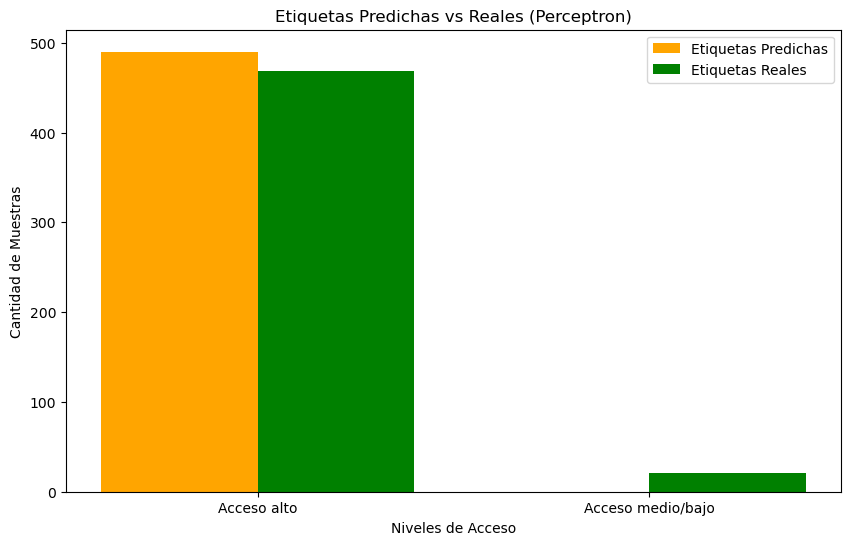

In [18]:
# Create a bar chart for the predicted labels and actual data
unique_labels_pred, counts_pred = np.unique(y_pred_categories, return_counts=True)
unique_labels_actual, counts_actual = np.unique(y_test_categories, return_counts=True)

labels = ['Acceso alto', 'Acceso medio/bajo']

for label in labels:
    if label not in unique_labels_pred:
        unique_labels_pred = np.append(unique_labels_pred, label)
        counts_pred = np.append(counts_pred, 0)
    if label not in unique_labels_actual:
        unique_labels_actual = np.append(unique_labels_actual, label)
        counts_actual = np.append(counts_actual, 0)

sorted_labels = ['Acceso alto', 'Acceso medio/bajo']
sorted_pred_counts = [counts_pred[unique_labels_pred == label][0] for label in sorted_labels]
sorted_actual_counts = [counts_actual[unique_labels_actual == label][0] for label in sorted_labels]

x = np.arange(len(sorted_labels))
width = 0.4

fig, ax = plt.subplots(figsize=(10, 6))
rects_pred = ax.bar(x - width/2, sorted_pred_counts, width, label='Etiquetas Predichas', color='orange')
rects_actual = ax.bar(x + width/2, sorted_actual_counts, width, label='Etiquetas Reales', color='g')

# Labels on the x axis
ax.set_xticks(x)
ax.set_xticklabels(sorted_labels)  

# Tags and title
ax.set_xlabel('Niveles de Acceso')
ax.set_ylabel('Cantidad de Muestras')
ax.set_title('Etiquetas Predichas vs Reales (Perceptron)')

# Add legend
ax.legend()

# Print predictions and real data
print("Precisión del Perceptrón:", accuracy)
print("Predicciones:", sorted_pred_counts)
print("Datos Reales:", sorted_actual_counts)

plt.show()

### KNN from scratch Graph

Precisión del KNN: 0.8530612244897959
Predicciones: [423, 67]
Datos Reales: [469, 21]


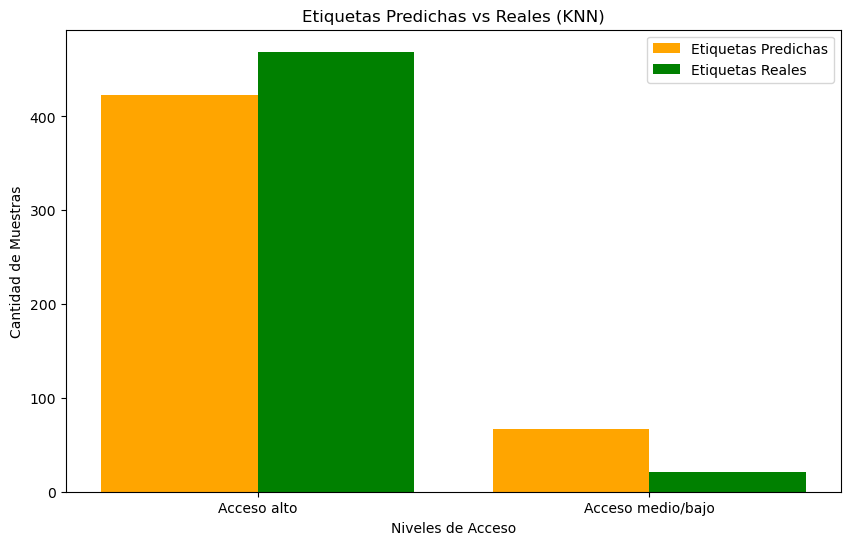

In [19]:
unique_labels_pred, counts_pred = np.unique(y_pred_categories_knn, return_counts=True)
unique_labels_actual, counts_actual = np.unique(y_test_categories, return_counts=True)

labels = ['Acceso alto', 'Acceso medio/bajo']

for label in labels:
    if label not in unique_labels_pred:
        unique_labels_pred = np.append(unique_labels_pred, label)
        counts_pred = np.append(counts_pred, 0)
    if label not in unique_labels_actual:
        unique_labels_actual = np.append(unique_labels_actual, label)
        counts_actual = np.append(counts_actual, 0)

sorted_labels = ['Acceso alto', 'Acceso medio/bajo']
sorted_pred_counts = [counts_pred[unique_labels_pred == label][0] for label in sorted_labels]
sorted_actual_counts = [counts_actual[unique_labels_actual == label][0] for label in sorted_labels]

x = np.arange(len(sorted_labels))
width = 0.4

fig, ax = plt.subplots(figsize=(10, 6))
rects_pred = ax.bar(x - width/2, sorted_pred_counts, width, label='Etiquetas Predichas', color='orange')
rects_actual = ax.bar(x + width/2, sorted_actual_counts, width, label='Etiquetas Reales', color='g')

# Labels on the x axis
ax.set_xticks(x)
ax.set_xticklabels(sorted_labels)  

# Tags and title
ax.set_xlabel('Niveles de Acceso')
ax.set_ylabel('Cantidad de Muestras')
ax.set_title('Etiquetas Predichas vs Reales (KNN)')

# Add legend
ax.legend()

# Print predictions and real data
print("Precisión del KNN:", accuracy_knn)
print("Predicciones:", sorted_pred_counts)
print("Datos Reales:", sorted_actual_counts)

plt.show()

### Perceptron with libraries Graph

Precisión del Perceptrón: 0.9795918367346939
Predicciones: [461, 29]
Datos Reales: [469, 21]


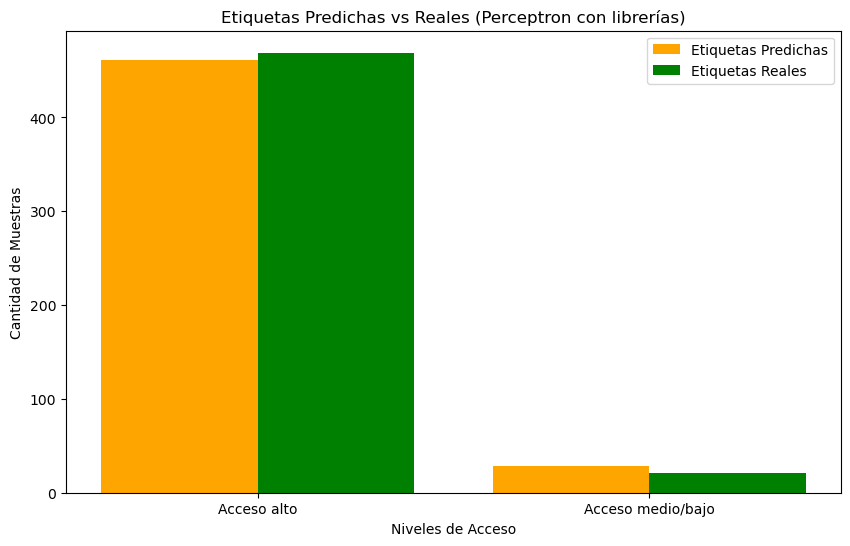

In [20]:
unique_labels_pred, counts_pred = np.unique(y_pred_categories_per, return_counts=True)
unique_labels_actual, counts_actual = np.unique(y_test_categories, return_counts=True)

labels = ['Acceso alto', 'Acceso medio/bajo']

for label in labels:
    if label not in unique_labels_pred:
        unique_labels_pred = np.append(unique_labels_pred, label)
        counts_pred = np.append(counts_pred, 0)
    if label not in unique_labels_actual:
        unique_labels_actual = np.append(unique_labels_actual, label)
        counts_actual = np.append(counts_actual, 0)

sorted_labels = ['Acceso alto', 'Acceso medio/bajo']
sorted_pred_counts = [counts_pred[unique_labels_pred == label][0] for label in sorted_labels]
sorted_actual_counts = [counts_actual[unique_labels_actual == label][0] for label in sorted_labels]

x = np.arange(len(sorted_labels))
width = 0.4

fig, ax = plt.subplots(figsize=(10, 6))
rects_pred = ax.bar(x - width/2, sorted_pred_counts, width, label='Etiquetas Predichas', color='orange')
rects_actual = ax.bar(x + width/2, sorted_actual_counts, width, label='Etiquetas Reales', color='g')

# Labels on the x axis
ax.set_xticks(x)
ax.set_xticklabels(sorted_labels)  

# Tags and title
ax.set_xlabel('Niveles de Acceso')
ax.set_ylabel('Cantidad de Muestras')
ax.set_title('Etiquetas Predichas vs Reales (Perceptron con librerías)')

# Add legend
ax.legend()

# Print predictions and real data
print(f'Precisión del Perceptrón: {accuracy_lib_per}')
print("Predicciones:", sorted_pred_counts)
print("Datos Reales:", sorted_actual_counts)

plt.show()

### KNN with libraries Graph

Precisión del kNN: 0.9551020408163265
Predicciones: [473, 17]
Datos Reales: [469, 21]


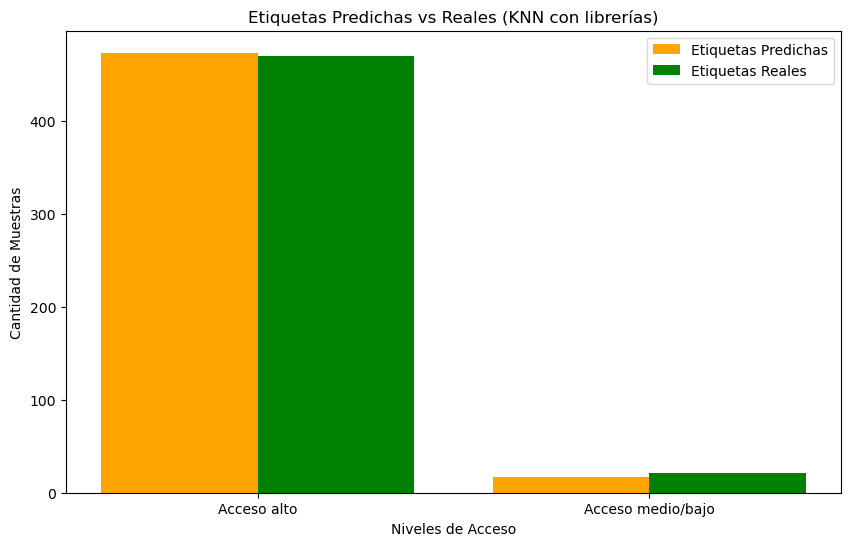

In [21]:
unique_labels_pred, counts_pred = np.unique(y_pred_categories_lib_knn, return_counts=True)
unique_labels_actual, counts_actual = np.unique(y_test_categories, return_counts=True)

labels = ['Acceso alto', 'Acceso medio/bajo']

for label in labels:
    if label not in unique_labels_pred:
        unique_labels_pred = np.append(unique_labels_pred, label)
        counts_pred = np.append(counts_pred, 0)
    if label not in unique_labels_actual:
        unique_labels_actual = np.append(unique_labels_actual, label)
        counts_actual = np.append(counts_actual, 0)

sorted_labels = ['Acceso alto', 'Acceso medio/bajo']
sorted_pred_counts = [counts_pred[unique_labels_pred == label][0] for label in sorted_labels]
sorted_actual_counts = [counts_actual[unique_labels_actual == label][0] for label in sorted_labels]

x = np.arange(len(sorted_labels))
width = 0.4

fig, ax = plt.subplots(figsize=(10, 6))
rects_pred = ax.bar(x - width/2, sorted_pred_counts, width, label='Etiquetas Predichas', color='orange')
rects_actual = ax.bar(x + width/2, sorted_actual_counts, width, label='Etiquetas Reales', color='g')

# Labels on the x axis
ax.set_xticks(x)
ax.set_xticklabels(sorted_labels) 

# Tags and title
ax.set_xlabel('Niveles de Acceso')
ax.set_ylabel('Cantidad de Muestras')
ax.set_title('Etiquetas Predichas vs Reales (KNN con librerías)')

# Add legend
ax.legend()

# Print predictions and real data
print("Precisión del kNN:", accuracy_lib_knn)
print("Predicciones:", sorted_pred_counts)
print("Datos Reales:", sorted_actual_counts)

plt.show()